In [ ]:
from accelerate import Accelerator  

# 创建一个Accelerator实例，并设置日志存储路径logging_dir  
accelerator = Accelerator(logging_dir="./logs") 

In [ ]:
!pip install onnx onnxruntime

In [1]:
!sudo apt install graphviz -y


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [3]:
!pip install torchviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/906.4 MB 2.9 MB/s eta 0:03:53^C
     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/906.4 MB 2.9 MB/s eta 0:03:53
ERROR: Operation cancelled by user


In [ ]:
import torch
from torch import nn
# from torchvision import models
from torchviz import makee_dot, make_dot_from_trace

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

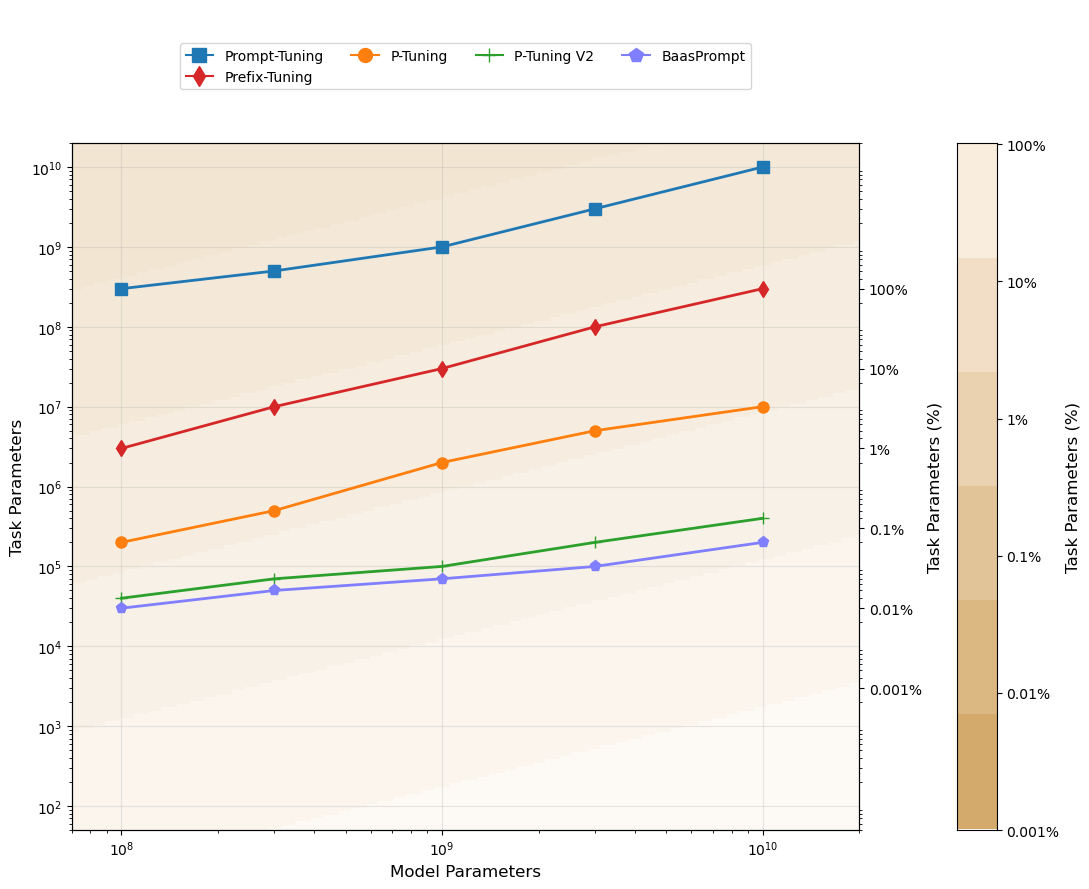

In [5]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap  
from matplotlib.lines import Line2D  
from matplotlib.gridspec import GridSpec  

# 创建图形和子图布局  
fig = plt.figure(figsize=(11, 9))  
# gs = GridSpec(2, 1, height_ratios=[1, 6])  
gs = GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 6])  # 2x2的网格，右侧较窄
ax_legend = fig.add_subplot(gs[0,0])  # gs[0]
ax = fig.add_subplot(gs[1,0])    # gs[1]
ax_colorbar = fig.add_subplot(gs[1, 1])  # 颜色映射条

# 数据  
x = np.array([1e8, 3e8, 1e9, 3e9, 1e10])  

prompt_tuning = np.array([3e8, 5e8, 1e9, 3e9, 1e10])  
prefix_tuning = np.array([3e6, 1e7, 3e7, 1e8, 3e8])  
p_tuning = np.array([2e5, 5e5, 2e6, 5e6, 1e7])  
p_tuning_v2 = np.array([4e4, 7e4, 1e5, 2e5, 4e5])  
baas_prompt = np.array([3e4, 5e4, 7e4, 1e5, 2e5])  

# 创建斜向渐变背景  
x_min, x_max = 7e7, 2e10  
y_min, y_max = 5e1, 2e10  

# 创建网格点  
xx, yy = np.meshgrid(np.logspace(np.log10(x_min), np.log10(x_max), 200),  
                     np.logspace(np.log10(y_min), np.log10(y_max), 200))  

# 计算每个点的比例值（取对数以使带子均匀分布）  
zz = np.log10(yy/xx)  

# 创建自定义颜色映射  
colors = [(0.98, 0.93, 0.87),  
          (0.95, 0.87, 0.78),  
          (0.92, 0.82, 0.69),  
          (0.89, 0.77, 0.60),  
          (0.86, 0.72, 0.51),  
          (0.83, 0.67, 0.42)]  
n_bins = 6  
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)  

# 绘制背景  
ax.pcolormesh(xx, yy, zz, cmap=cmap, alpha=0.3, shading='auto')  

# 定义颜色和样式  
colors = {  
    'Prompt-Tuning': '#1f77b4',  
    'Prefix-Tuning': '#d62728',  
    'P-Tuning': '#ff7f0e',  
    'P-Tuning V2': '#2ca02c',  
    'BaasPrompt': '#7f7fff',  
}  

markers = {  
    'Prompt-Tuning': 's',  
    'Prefix-Tuning': 'd',  
    'P-Tuning': 'o',  
    'P-Tuning V2': '+',  
    'BaasPrompt': 'p'  
}  

# 绘制主图线条  
ax.plot(x, prompt_tuning, '-', color=colors['Prompt-Tuning'], marker=markers['Prompt-Tuning'],   
        label='Prompt-Tuning', linewidth=2, markersize=8)  
ax.plot(x, prefix_tuning, '-', color=colors['Prefix-Tuning'], marker=markers['Prefix-Tuning'],   
        label='Prefix-Tuning', linewidth=2, markersize=8)  
ax.plot(x, p_tuning, '-', color=colors['P-Tuning'], marker=markers['P-Tuning'],   
        label='P-Tuning', linewidth=2, markersize=8)  
ax.plot(x, p_tuning_v2, '-', color=colors['P-Tuning V2'], marker=markers['P-Tuning V2'],   
        label='P-Tuning V2', linewidth=2, markersize=8)  
ax.plot(x, baas_prompt, '-', color=colors['BaasPrompt'], marker=markers['BaasPrompt'],   
        label='BaasPrompt', linewidth=2, markersize=8)  

# 设置主图坐标轴  
ax.set_xscale('log')  
ax.set_yscale('log')  
ax.set_xlim(x_min, x_max)  
ax.set_ylim(y_min, y_max)  
ax.set_xlabel('Model Parameters', fontsize=12)  
ax.set_ylabel('Task Parameters', fontsize=12)  

# 添加网格  
ax.grid(True, alpha=0.3)  

# 添加百分比刻度  
ax_right = ax.twinx()  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_right.set_yscale('log')  
ax_right.set_ylim(ax.get_ylim())  
ax_right.set_ylabel('Task Parameters (%)', fontsize=12)  
ax_right.set_yticks([model_tuning[0] * p/100 for p in percentages])  
ax_right.set_yticklabels([f'{p}%' for p in percentages])  



# 创建颜色映射条  
gradient = np.linspace(0, 1, 256).reshape(256, 1)  
gradient = np.repeat(gradient, 10, axis=1)  
ax_colorbar.imshow(gradient, aspect='auto', cmap=cmap)  

# 设置颜色映射条的刻度  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_colorbar.set_yticks(np.linspace(0, 256, len(percentages)))  
ax_colorbar.set_yticklabels([f'{p}%' for p in percentages])

# 设置颜色映射条的样式  
ax_colorbar.set_xticks([])  # 移除x轴刻度  
ax_colorbar.yaxis.set_label_position('right')  
ax_colorbar.yaxis.set_ticks_position('right')  
ax_colorbar.set_ylabel('Task Parameters (%)', fontsize=12)  


# 创建顶部图例  
legend_elements = [  
    Line2D([0], [0], color=colors['Prompt-Tuning'], marker=markers['Prompt-Tuning'],   
           markersize=10, label='Prompt-Tuning', linestyle='-'),  
    Line2D([0], [0], color=colors['Prefix-Tuning'], marker=markers['Prefix-Tuning'],   
           markersize=10, label='Prefix-Tuning', linestyle='-'),  
    Line2D([0], [0], color=colors['P-Tuning'], marker=markers['P-Tuning'],   
           markersize=10, label='P-Tuning', linestyle='-'),  
    Line2D([0], [0], color=colors['P-Tuning V2'], marker=markers['P-Tuning V2'],   
           markersize=10, label='P-Tuning V2', linestyle='-'),  
    Line2D([0], [0], color=colors['BaasPrompt'], marker=markers['BaasPrompt'],   
           markersize=10, label='BaasPrompt', linestyle='-'),  
]  

# 设置顶部图例  
ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=True)  
ax_legend.axis('off')  

# 调整布局  
plt.tight_layout()  
plt.savefig('parameter_comparison.svg', format="svg", bbox_inches='tight', dpi=300)  
plt.show()